![](https://www.flyability.com/hs-fs/hubfs/SEO%20content/Commercial%20drones/commercial-drones-parrot-anafi-usa.png?width=1200&name=commercial-drones-parrot-anafi-usa.png)

# Quadcopter Dynamics and Control

by Kevin J. Walchko, Phd

July 2021

---

# References

- YouTube: [Class 6 - Quadrotor Dynamics](https://www.youtube.com/watch?v=UC8W3SfKGmg)
- Matlab: [6DOF (Euler Angles)](https://www.mathworks.com/help/aeroblks/6dofeulerangles.html)

## Simulink Reference

Using the 6DoF block as an idea for how to build my drone model ... not done yet.

![](pics/simulink-block.gif)

![](pics/simulink-frame.png)

## Variables and Units

| Symbol     | Units   | Definition |
|------------|:-------:|:-----------|
| $F_i$      | N       | Force      |
| $M_i$      | Nm      | Moment     |
| $\gamma$   | m       | torque/force ratio |
| $n$        | rpm     | motor shaft speed |
| $\omega$   | rad/sec | rotation rate of the drone body $\begin{bmatrix} p & q & r \end{bmatrix}^T$ |
| $L$        | m       | distance from CoM to motor |
| $J$        | kg.m^2  | rotational inertia |
| $I_m$      | kg.m^2  | motor inertia |
| $v$        | m/sec   | linear body velocity, $\begin{bmatrix} u & v & w \end{bmatrix}^T$ |


## Motion

The diagram below shows the direction of the propellers spining. By increasing the speed and decreasing the speed of the combinations of motors, the following can be achieved: up, down, roll, pitch, and rotate about z-axis. Note, that the system is under actuated, since there is no direct way to move in the horizontal plane without some combination of roll/pitch first. Thus there is 1 DoF for z-axis translational motion and 3 DoF for rotational motion for a total of 4 DoF.

![](pics/movement.jpg)

Remeber, the diagrams above show propellor spin direction. Since the propellor is pushing on the air as it spins, this causes the resulting torque transfered to the aircraft frame to be in the opposite direction.

![](pics/torque.jpg)

### Motors

$$
F_i = k_F n_i^2 \\
M_i = k_M n_i^2 + I_m \dot n_i
$$

So we can simplify the motor torque by:

$$
\dot n_i \approx 0 \therefore k_M n_i^2 + I_m \dot n_i \to k_M n_i^2
$$

Also, for deriving equations, since there is a relationship between forces and
torques, we can write:

$$
\gamma = \frac {k_M}{k_F} = \frac {M_i}{F_i} \to M_i = \gamma F_i
$$

Note that although the motor constants $k_M$ and $k_F$ are shown as constant, they do vary with air density, temperature, friction, etc.

## Dynamics

### Translational

Starting with Newton's Law:

$$
m \frac{dv}{dt} = m \dot v = F \\
$$

Translational motion in the *inertial frame*:

$$
m \ddot r = \begin{bmatrix} 0 \\ 0 \\ -mg \end{bmatrix} + R^n_b \begin{bmatrix} 0 \\ 0 \\ F_1 & F_2 & F_3 & F_4 \end{bmatrix}
$$

Now we can isolate the translational control forces, which control the drone as:

$$
u_1 \equiv \begin{bmatrix} 0 \\ 0 \\ F_1 & F_2 & F_3 & F_4 \end{bmatrix}
$$

Later, we will use both the translational and rotational control terms in our controller.

### Rotational

Let's start with assuming the drone is symetrical, then the inertia ($J$) is:

$$
J = 
\begin{bmatrix}
  J_x & 0 & 0 \\
  0 & J_y & 0 \\
  0 & 0 & J_z
\end{bmatrix}
$$

Additionally, if we assume the drone is in an X shape, then $J_x = J_y$. However, just in case it isn't because of payload, we won't simplify the equations below. 

Euler's Equation in the *body frame*: 

$$
M = J \dot \omega + \omega \times (J \omega) \\
J \dot \omega = M - \omega \times (J \omega) \\
\dot \omega = J^{-1}[M - \omega \times (J \omega)] \\
\dot \omega = 
  \begin{bmatrix}
    M_x/J_x \\
    M_y/J_y \\
    M_z/J_z \\
  \end{bmatrix} - 
  \begin{bmatrix}
    \frac {J_y - J_z}{J_x} q \cdot r \\
    \frac {J_z - J_x}{J_y} p \cdot r \\
    \frac {J_x - J_y}{J_z} p \cdot q \\
  \end{bmatrix}
$$

where $\omega^b = \begin{bmatrix} p & q & r \end{bmatrix}^T$. Now calculating the control moments by rearranging and substituting in $M_i = \gamma F_i$:

$$
u_2 \equiv M = 
\begin{bmatrix} 
  L(F_2-F_4) \\
  L(F_3-F_1) \\
  M_1 - M_2 + M_3 - M_4
\end{bmatrix} =
\begin{bmatrix} 
  0 & L & 0 & -L \\
  -L & 0 & L & 0 \\
  \gamma & -\gamma & \gamma & -\gamma
\end{bmatrix}\begin{bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{bmatrix}
$$

Now you can define your control input as a combination of motor forces, motor locations, and force/torque ratios:

$$
u = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} =
\begin{bmatrix} 
  1 & 1 & 1 & 1 \\
  0 & L & 0 & -L \\
  -L & 0 & L & 0 \\
  \gamma & -\gamma & \gamma & -\gamma
\end{bmatrix}
\begin{bmatrix} F_1 \\ F_2 \\ F_3 \\ F_4 \end{bmatrix} = 
\begin{bmatrix} thrust \\ moment_x \\ moment_y \\ moment_z \end{bmatrix}
$$

$$
u = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} =
k_f\begin{bmatrix} 
  1 & 1 & 1 & 1 \\
  0 & L & 0 & -L \\
  -L & 0 & L & 0 \\
  \gamma & -\gamma & \gamma & -\gamma
\end{bmatrix}
\begin{bmatrix} n1^2 \\ n2^2 \\ n3^2 \\ n4^2 \end{bmatrix} = 
\begin{bmatrix} thrust \\ moment_x \\ moment_y \\ moment_z \end{bmatrix}
$$

In [5]:
import numpy as np
import simplejson as json
from matplotlib import pyplot as plt
from collections import deque
from math import sin, pi

In [2]:
from pyrk import RK4
from squaternion import Quaternion
from pprint import pprint

In [3]:
# AR drone v2
params = {
    'm': 0.429,
    'l': 0.1785,
    'J': [2.238e-3, 2.986e-3, 4.804e-3],
    'kf': 8.050e-6,
    'km': 2.423e-7,
    'tau': 4.718e-3,
    'nmax': 1047
}

pprint(params)

{'J': [0.002238, 0.002986, 0.004804],
 'kf': 8.05e-06,
 'km': 2.423e-07,
 'l': 0.1785,
 'm': 0.429,
 'nmax': 1047,
 'tau': 0.004718}


In [61]:
class Drone:
    def __init__(self, params=None):
        if params is None:
            params = {}
        if not isinstance(params, dict):
            raise Exception()
            
        self.m = params.get('m', 1)
        self.gg = params['km'] / params['kf']
        self.J = params['J']
        self.kf = params['kf']
        self.L = params['l']
        
        self.q = Quaternion()
            
    def model(self, t, x, u):
        """
        x = [p,v,w,q] => 13
        """
        gg = self.gg
        kf = self.kf
        L = self.L
        m = self.m
        R = np.array(self.q.to_rot())
        
        p,q,r = x[6:9] 
        
        n1,n2,n3,n4 = u
        g = 9.81
        
        Jx, Jy, Jz = self.J
        
        F1 = kf*n1**2
        F2 = kf*n2**2
        F3 = kf*n3**2
        F4 = kf*n4**2
        F = np.array([0,0,F1+F2+F3+F4])
        
        MJ = np.array([
            L*(F2-F4)/Jx, 
            L*(F3-F1)/Jy, 
            gg*(F1-F2+F3-F4)/Jz
        ])
        
        wJw = np.array([
            (Jy - Jz)/Jx*q*r,
            (Jz - Jx)/Jy*p*r,
            (Jx - Jy)/Jz*p*q,
        ])
        
        # ans = [p,v,w,q] => 13
        ans = np.zeros(13)
        
        ans[:3] = x[3:6]  # v
        ans[3:6] = R.dot(F)/m - np.array([0,0,g]) # inertial
        ans[6:9] = MJ-wJw                         # body
        
        q = Quaternion(*x[9:])
        w = Quaternion(0,*x[6:9])
        ans[9:] = 0.5*q*w
        return ans

In [64]:
step = 0.001

drone = Drone(params)

# 350rpm cancelles out gravity
u = 350.0*np.array([1,.5,1,1])

rk = RK4(drone.model)
y = np.zeros(13)
y[9] = 1
t = 0.0

ui = []
yi = []
ti = []

for i in range(1000):
    y = rk.step(y,u,t,step)
    drone.q = Quaternion(*y[9:])
    t += step
    ti.append(t)
    yi.append(y)
    ui.append(u)

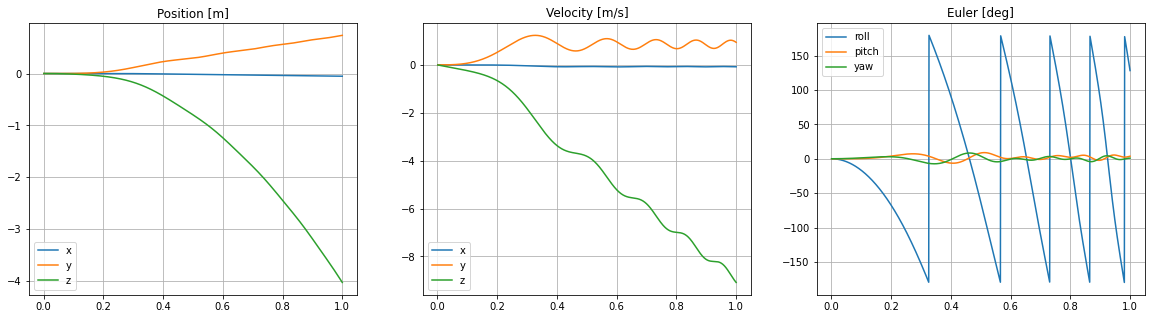

In [65]:
p = []
v = []
w = []
euler = []
for y in yi:
    p.append(y[:3])   # position [m]
    v.append(y[3:6])  # velocity [m/s]
    w.append(y[6:9])  # w [rads/s]
    q = Quaternion(*y[9:])
    euler.append(q.to_euler(True))
v = np.array(v)
w = np.array(w)
p = np.array(p)
euler = np.array(euler)

plt.subplots(1,1, figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(ti, p[:,0], label="x")
plt.plot(ti, p[:,1], label="y")
plt.plot(ti, p[:,2], label="z")
plt.legend()
plt.title('Position [m]')
plt.grid(True)

plt.subplot(1,3,2)
plt.plot(ti, v[:,0], label="x")
plt.plot(ti, v[:,1], label="y")
plt.plot(ti, v[:,2], label="z")
plt.legend()
plt.title('Velocity [m/s]')
plt.grid(True)

plt.subplot(1,3,3)
plt.plot(ti, euler[:,0], label="roll")
plt.plot(ti, euler[:,1], label="pitch")
plt.plot(ti, euler[:,2], label="yaw")
plt.legend()
plt.title('Euler [deg]')
plt.grid(True)

# plt.subplot(1,3,3)
# plt.plot(ui);

In [8]:
np.zeros(13)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])